# <center>Sygnały jako wektory</center>

Ustawiamy bibliotekę matplotlib na wyświetlanie w oknie notebook'a:

In [1]:
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function
%matplotlib inline

W wypadku systemów windows można naprawić kodowanie znaków następującym skryptem:

In [2]:
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

Następnie importujemy biblioteki wykorzystywane w tym notebook'u:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Arial')

### Czym jest wektor?
W najprostszej wersji znanej ze szkoły wektory rozumiane są tak jak na tym rysunku:

<img src="img/Wektor_by_Zureks.svg">

Koncepcje wektora można uogólnić i rozumieć go jako uporządkowany ciąg liczb, czyli współrzędnych wektora:

<figure>
<img src="img/Plane_Cartesian_vector.png">
 <figcaption>Wektor na płaszczyźnie kartezjańskiej przedstawiający położenie punktu A o współrzędnych (2, 3).</figcaption>
</figure>

Łatwo sobie wyobrazić, że tą koncepcję można uogólnić na dowolną liczbę współrzędnych (wymiarów). Wtedy trudniej jest przedstawić go w postaci strzałki, ale możemy przedstawić go np. tak, że kolejne współrzędne rysyjemy jako punkty na dwuwymiarowej płaszczyźnie (nr współrzędnej, wartość współrzędnej):

Widać, że taka reprezentacja świetnie nadaje się do przedstawiania sygnałów dyskretnych (Sygnały ciągłe można rozumieć jako wektory w nieskończenie wymiarowej przestrzeni). 

/home/pawel/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


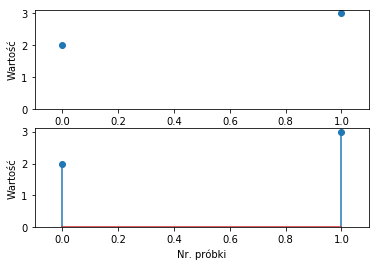

In [4]:
A = np.array([2,3])
plt.subplot(2,1,1)
plt.plot(A,'o')
plt.xlim([-0.1, 1.1])
plt.ylim([0,3.1])
plt.ylabel(u'Wartość')

plt.subplot(2,1,2)
plt.stem(A)
plt.xlim([-0.1, 1.1])
plt.ylim([0,3.1])
plt.ylabel('Wartość')
plt.xlabel('Nr. próbki')
plt.show()

### Zadanie: reprezentacja sygnałów 
Przedstaw wektor $[0,0,1,1,1,0,0,0,1,1,1,0,0]$ jak w przykładzie powyżej

/home/pawel/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


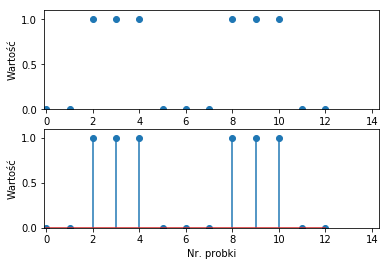

In [5]:
A = np.array([0,0,1,1,1,0,0,0,1,1,1,0,0])
plt.subplot(2,1,1)
plt.plot(A,'o')
plt.xlim([-0.1, len(A)*1.1])
plt.ylim([0,np.max(A)+0.1])
plt.ylabel('Wartość')
 
plt.subplot(2,1,2)
plt.stem(A)
plt.xlim([-0.1, len(A)*1.1])
plt.ylim([0,np.max(A)*1.1])
plt.ylabel('Wartość')
plt.xlabel('Nr. probki')
plt.show()


### Dodawanie sygnałów
Wektory dodajemy sumując wartości odpowiadających sobie współrzędnych np.:

(0,1) + (1,0) = (1,1)

Tak samo dodajemy sygnały: punkt po punkcie.

### Zadanie: dodawanie sygnałów
Proszę:
* dodać sygnały: $x_1 = (1,2,2,1,3,2,1)$,  $x_2 = (2,1,2,1,2,1,2)$
* wypisać wynik i zilustrować za pomocą subplotów i  funkcji stem
* wygenerować dwa sygnały sin próbkowane 1000Hz, o czasie trwania 1s, i częstościach odpowiednio 10 i 20 Hz
* zilustruj oba sygnały i wynik ich dodawania



[3 3 4 2 5 3 3]


/home/pawel/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


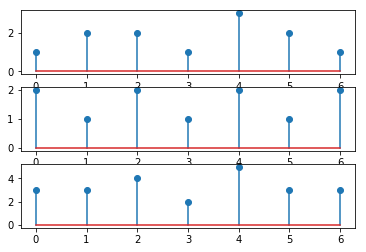

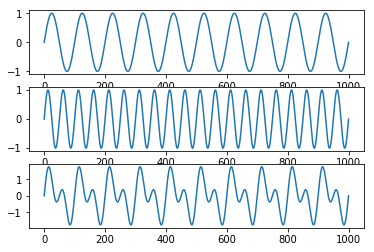

In [17]:
x1 = np.array([1,2,2,1,3,2,1])
x2 = np.array([2,1,2,1,2,1,2])

print(x1+x2)
plt.subplot(3,1,1)
plt.stem(x1)
plt.subplot(3,1,2)
plt.stem(x2)
plt.subplot(3,1,3)
plt.stem(x1+x2)
plt.show()

T = np.linspace(0,1,1000)
y1 = np.sin(2*np.pi*10*T)
y2 = np.sin(2*np.pi*20*T)

plt.subplot(3,1,1)
plt.plot(y1)
plt.subplot(3,1,2)
plt.plot(y2)
plt.subplot(3,1,3)
plt.plot(y1+y2)
plt.show()

### Mnożenie przez liczbę
Mnożenie wektora przez liczbę (skalar) robimy mnożąc kazdą ze współrzędnych przez tą liczbę, np.: 
: 5*(1, 2)  = (5, 10).
Analogicznie mnożenie sygnału przez liczbę polega na pomnożeniu wartości każdej próbki przez tę liczbę. 

### Zadanie: mnożenie sygnałów przez liczbę:
* przedstaw przemnożenie sygnału $\sin(2 \pi 10 t)$ przez 5.

/home/pawel/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


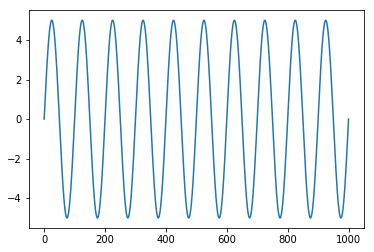

In [18]:
plt.plot(y1*5)

### Iloczyn skalarny
Iloczyn skalarny liczymy mnożąc przez sibie odpowiadające sobie współrzędne i dodając powstałe iloczyny:

| x1| -2| -2| 2| -1| -2|-|
|-------------------------|
| x2| -1| -1| 1| 1 | 0 |-|
|* | 2| 2| 2| -1| 0| = 5|

### Zadanie: iloczyn skalarny sygnałów
Proszę zaimplementować to obliczenie za pomocą mnożenia i sumowania w pętli, a następnie za pomocą <tt>np.dot</tt>


In [36]:
def dotProduct(array1, array2):
    if len(array1) == len(array2):
        return sum([array1[i]*array2[i] for i in range(len(array1))])
    else:
        raise Exception('Wektory mają różne wymiary')
    
print("My function: ", dotProduct(y1,y2))
print("Numpy function: ", np.dot(y1,y2))

My function:  3.86999460256e-14
Numpy function:  3.50362100443e-14


### Iloczyn skalarny jako miara podobieństwa
Przypomnijmy, że iloczyn skalarny można obliczyć tak:

$x \cdot y  = |x| |y| \cos( \phi)$

czyli:

$\frac{x}{|x|} \cdot \frac{y}{|y|}  =  \cos( \phi)$

Widać, że po znormalizowaniu wektorów iloczyn skalarny jest równy $\cos$ kąta pomiędzy wektorami. Gdy wektory są ortogonalne to jest 0, jeśli są równoległe to jest 1, w pozostałych przypadkach ma wartości pomiędzy -1, a 1 . Jest to miara podobieństwa między wektorami.
### Zadanie: cosinus kąta między sygnałami
a) Znormalizuj (tzn. podziel prze normę; <tt>np.linalg.norm</tt>), oblicz iloczyny skalarne i zilustruj wektory:
<center>$x1 = [-2, 0, 2, 2, 0, -2, -2, 0, 2, 2]$</center>

<center>$x2 = [-2, 0, 1, 2, 0, -1, -2, 0, 1, 2]$</center>

b) Znormalizuj, oblicz iloczyny skalarne i zilustruj wektory:
<center>$x1 = [-2, 0, 2,  2,  0,-2, -2, 0, 2, 2]$</center>

<center>$x2 = [ 1, 2, 0, -1, -2,  0,  1,  2, 0, -1]$</center>

In [ ]:
x1 = np.array([-2, 0, 2, 2, 0, -2,-2, 0, 2, 2])
x2 = np.array([-2, 0, 1, 2, 0, -1, -2, 0, 1, 2])
...